In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


In [6]:
# Load the data
car_data = pd.read_csv('cardata_encoded.csv')
car_data.head()

,Owner,modelYear,price,Kms Driven,Mileage,Engine,Car Age,Fuel Type_Cng,Fuel Type_Diesel,Fuel Type_Electric,Fuel Type_Lpg,Fuel Type_Petrol,Body type_Convertibles,Body type_Coupe,Body type_Hatchback,Body type_MUV,Body type_Minivans,Body type_Pickup Trucks,Body type_SUV,Body type_Sedan,Body type_Wagon,Transmission_Automatic,Transmission_Manual,Brand_Audi,Brand_BMW,Brand_Chevrolet,Brand_Citroen,Brand_Datsun,Brand_Fiat,Brand_Ford,Brand_Hindustan Motors,Brand_Honda,Brand_Hyundai,Brand_Isuzu,Brand_Jaguar,Brand_Jeep,Brand_Kia,Brand_Land Rover,Brand_MG,Brand_Mahindra,...,model_Toyota Camry,model_Toyota Corolla,model_Toyota Corolla Altis,model_Toyota Etios,model_Toyota Etios Cross,model_Toyota Etios Liva,model_Toyota Fortuner,model_Toyota Glanza,model_Toyota Innova,model_Toyota Innova Crysta,model_Toyota Land Cruiser 300,model_Toyota Qualis,model_Toyota Urban cruiser,model_Toyota Yaris,model_Volkswagen Ameo,model_Volkswagen CrossPolo,model_Volkswagen Jetta,model_Volkswagen Passat,model_Volkswagen Polo,model_Volkswagen Taigun,model_Volkswagen Vento,model_Volkswagen Virtus,model_Volvo S 80,model_Volvo S60,model_Volvo V40,model_Volvo XC 90,model_Volvo XC60,Insurance Validity_1,Insurance Validity_2,Insurance Validity_Comprehensive,Insurance Validity_Not Available,Insurance Validity_Third Party,Insurance Validity_Third Party insurance,Insurance Validity_Zero Dep,city_Bangalore,city_Chennai,city_Delhi,city_Hyderabad,city_Jaipur,city_Kolkata
0,3,2015,400000.0,120000,23.10,998,9,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0
1,2,2018,811000.0,32706,17.00,1497,6,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
2,1,2018,585000.0,11949,23.84,1199,6,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
3,1,2014,462000.0,17794,19.10,1197,10,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
4,1,2015,790000.0,60000,23.65,1248,9,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0


In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error,root_mean_squared_error


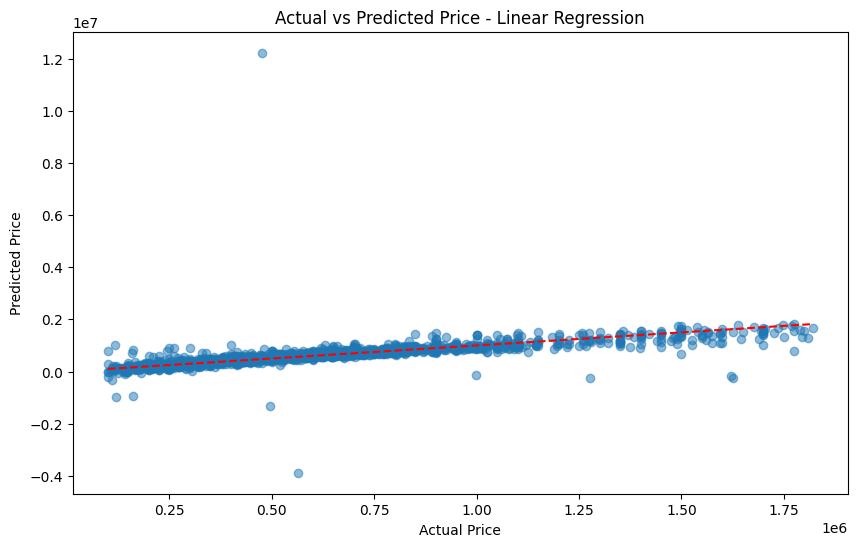

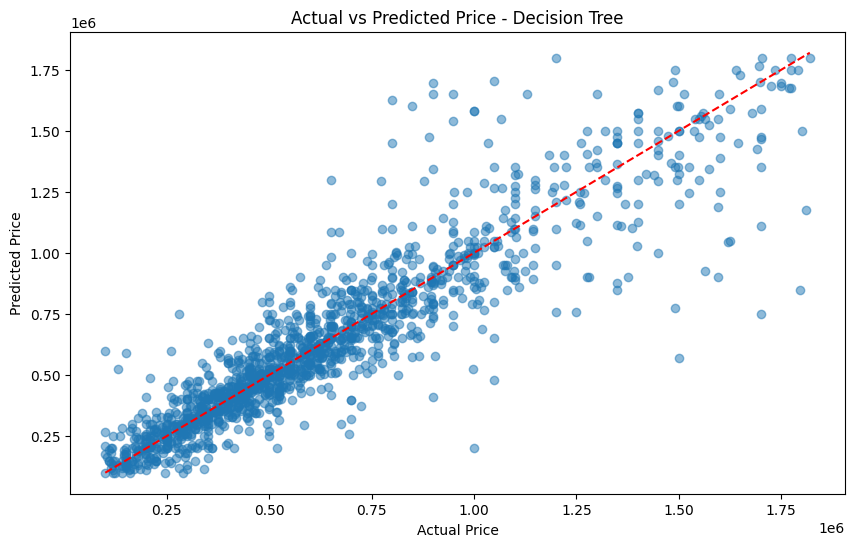

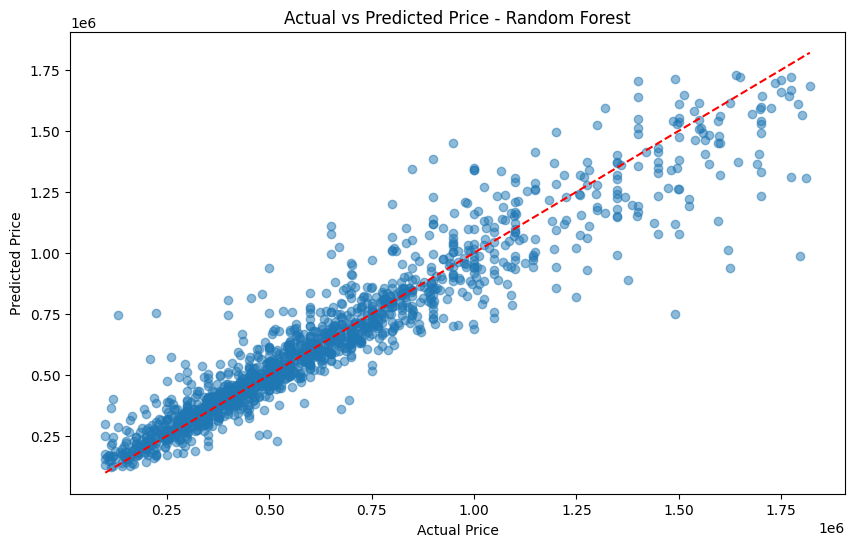

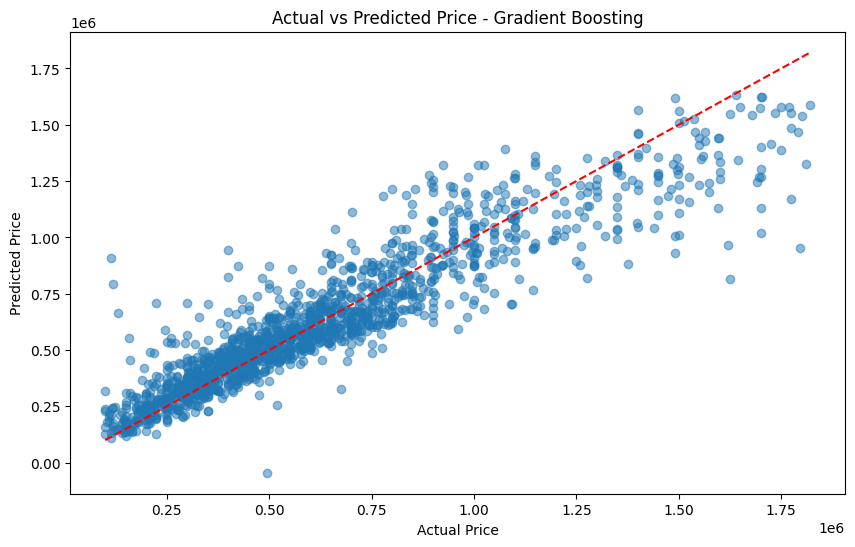

,Mean Squared Error,Root Mean Squared Error,Mean Absolute Error,R^2 Score
Linear Regression,1.354882e+11,368087.266060,108423.668964,-0.050615
Decision Tree,2.284125e+10,151133.228835,94435.776732,0.822882
Random Forest,1.303985e+10,114192.167243,72746.729881,0.898885
Gradient Boosting,1.964733e+10,140168.951617,96743.807808,0.847649


In [23]:
#create x and y
x=car_data.drop('price',axis=1)
y=car_data['price']


#split the data

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

#Assign the models
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "Gradient Boosting": GradientBoostingRegressor()
}

#Train the models
# Store results
results = {}

# Train and evaluate each model
for model_name, model in models.items():
    model.fit(x_train, y_train)
    predictions = model.predict(x_test)
    mse = mean_squared_error(y_test, predictions)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    results[model_name] = {
        'Mean Squared Error': mse,
        'Root Mean Squared Error': rmse,
        'Mean Absolute Error': mae,
        'R^2 Score': r2
    }

    # Plot actual vs predicted prices
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, predictions, alpha=0.5)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
    plt.xlabel("Actual Price")
    plt.ylabel("Predicted Price")
    plt.title(f"Actual vs Predicted Price - {model_name}")
    plt.show()

# Convert results to DataFrame and display it
results_df = pd.DataFrame(results).T
results_df

Regularization

In [25]:
from sklearn.linear_model import Ridge, Lasso
# Define a dictionary to hold the regularization models
regularization_models = {
    'Ridge Regression': Ridge(alpha=1.0),
    'Lasso Regression': Lasso(alpha=0.1),
}

# Store results separately for each regularization model
for model_name, model in regularization_models.items():
    # Fit the model
    model.fit(x_train, y_train)
    # Predict and evaluate
    predictions = model.predict(x_test)
    mse = mean_squared_error(y_test, predictions)
    mae = mean_absolute_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    rmse = np.sqrt(mse)
    
    # Store the metrics in results
    results[model_name] = {
        'Mean Squared Error': mse,
        'Mean Absolute Error': mae,
        'R^2 Score': r2,
        'Root Mean Squared Error': rmse
    }

# Convert updated results to DataFrame and display
results_df = pd.DataFrame(results).T
results_df

c:\Users\haris\Desktop\Car_dhekho\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.917e+13, tolerance: 8.071e+10
  model = cd_fast.enet_coordinate_descent(


,Mean Squared Error,Root Mean Squared Error,Mean Absolute Error,R^2 Score
Linear Regression,1.354882e+11,368087.266060,108423.668964,-0.050615
Decision Tree,2.284125e+10,151133.228835,94435.776732,0.822882
Random Forest,1.303985e+10,114192.167243,72746.729881,0.898885
Gradient Boosting,1.964733e+10,140168.951617,96743.807808,0.847649
Ridge Regression,2.319023e+10,152283.386309,95002.438906,0.820176
Lasso Regression,2.365010e+10,153785.899605,95076.655798,0.816610


In [30]:
# printing the best performing model
best_model = results_df[results_df['Mean Squared Error'] == results_df['Mean Squared Error'].min()]
print("Best Model is: ")
best_model


Best Model is: 


,Mean Squared Error,Root Mean Squared Error,Mean Absolute Error,R^2 Score
Random Forest,1.303985e+10,114192.167243,72746.729881,0.898885


Hyperparameter tuning for the model

In [34]:
from sklearn.model_selection import RandomizedSearchCV

# Redefining the parameter grid for Randomized Search
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    
}


# Initialize Random Forest model
rf_model = RandomForestRegressor(random_state=42)

# Initialize RandomizedSearchCV with cross-validation
random_search = RandomizedSearchCV(estimator=rf_model, param_distributions=param_grid, 
                                   n_iter=10, cv=3, scoring='r2', random_state=42, n_jobs=-1)

# Perform the randomized search
random_search.fit(x_train, y_train)

# Get the best estimator and its parameters
best_rf_model = random_search.best_estimator_
best_params = random_search.best_params_
best_score = random_search.best_score_


best_params, best_score

#calculate the metrics 
predictions = best_rf_model.predict(x_test)
mse = mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)
rmse = np.sqrt(mse)

# Store the metrics in results
results['Random Forest (Tuned)'] = {
    'Mean Squared Error': mse,
    'Mean Absolute Error': mae,
    'R^2 Score': r2,
    'Root Mean Squared Error': rmse
}

# Convert updated results to DataFrame and display
results_df = pd.DataFrame(results).T
results_df

,Mean Squared Error,Root Mean Squared Error,Mean Absolute Error,R^2 Score
Linear Regression,1.354882e+11,368087.266060,108423.668964,-0.050615
Decision Tree,2.284125e+10,151133.228835,94435.776732,0.822882
Random Forest,1.303985e+10,114192.167243,72746.729881,0.898885
Gradient Boosting,1.964733e+10,140168.951617,96743.807808,0.847649
Ridge Regression,2.319023e+10,152283.386309,95002.438906,0.820176
Lasso Regression,2.365010e+10,153785.899605,95076.655798,0.816610
Random Forest (Tuned),1.343405e+10,115905.370053,73322.555438,0.895828


In [59]:
# save the model using pickle
import pickle
with open('car_price_prediction.pkl', 'wb') as file:
    pickle.dump(best_rf_model, file)






In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from datetime import datetime

# Defining numerical and categorical features
categorical_features = ['Fuel Type', 'Transmission', 'Insurance Validity', 'city']
numerical_features = ['Owner', 'modelYear', 'Kms Driven', 'Mileage', 'Engine', 'Car Age']

# Column transformer with OneHotEncoder for categorical features and passthrough for numerical
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

# Initialize the Random Forest model (replace `best_rf_model` if you have a specific tuned model)
rf_model = RandomForestRegressor(random_state=42)

# Create a pipeline with the preprocessor and the model
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', rf_model)
])

# Load the data and calculate Car Age
car_data = pd.read_csv('all_city_cardata_outliers.csv')  # Load the data
car_data['Car Age'] = 2024 - car_data['modelYear']  # Calculate Car Age from model year
X = car_data.drop(columns='price')
y = car_data['price']

# Split the data for training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the pipeline on the training data
model_pipeline.fit(X_train, y_train)

# Define the prediction function with Car Age printing
def predict_car_price_with_age(model_pipeline, input_data):
    """
    Predicts the price of a car based on input data and prints the car's age.

    Parameters:
    - model_pipeline: Pipeline with preprocessing and trained model
    - input_data: Dictionary of input features

    Returns:
    - Predicted price of the car
    """
    # Calculate Car Age based on modelYear
    current_year = datetime.now().year
    input_data['Car Age'] = current_year - input_data['modelYear']
    
    # Print Car Age
    print(f"Car Age: {input_data['Car Age']} years")
    
    # Convert input data into a DataFrame
    input_df = pd.DataFrame([input_data])
    
    # Predict price using the pipeline
    predicted_price = model_pipeline.predict(input_df)
    
    print(f"The predicted price of the car is: {predicted_price[0]}")
    return predicted_price[0]

# Example usage of the prediction function
input_data = {
    'Brand': 'Maruti',
    "Body Type": "Hatch back",
    'Model': 'Maruti Celerio',
    'Owner': 3,
    'modelYear': 2015,
    'Kms Driven': 12000,
    'Mileage': 23.10,
    'Engine': 998,
    'Fuel Type': 'Petrol',
    'Transmission': 'Manual',
    'Insurance Validity': 'Third Party insurance',
    
    'city': 'Bangalore'
}

# Predict car price and print Car Age
predicted_price = predict_car_price_with_age(model_pipeline, input_data)


Car Age: 9 years
The predicted price of the car is: 357950.0


In [ ]:
# Save the model pipeline to a file


with open('rf_model_pipeline.pkl', 'wb') as file:
    pickle.dump(model_pipeline, file)
print("Model saved as 'rf_model_pipeline.pkl'")


Model saved as 'rf_model_pipeline.pkl'
